In [20]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import re
from nltk.corpus import stopwords

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
data_path = 'data/twitter_data'
data = pd.read_csv(data_path + '/tweet_train.csv', sep=',')
data.head()

,Tweet,label
0,What do you think?\nhttps://t.co/x6dE3HYtyv\nT...,0
1,Omggg Laurel is such a cunt 🤭😧 #HowToGetAwayWi...,0
2,A nigga with a gun would pop they ass https://...,1
3,Cunt fae Airdrie in love island haha class,1
4,"RT @h7ney: You 🛐 sucked my cock🍆, you both fuc...",0


In [4]:
# The entire dataset into one string for analysis
train_string = " ".join(data['Tweet'].values)
print(f"***** Extract of train_string ***** \n{train_string[:10]}", "\n")
# Split with white space
splits = train_string.split()  
print(f"***** Extract of splits ***** \n{splits[:10]}\n")

***** Extract of train_string ***** 
What do yo 

***** Extract of splits ***** 
['What', 'do', 'you', 'think?', 'https://t.co/x6dE3HYtyv', 'THE', 'RETARD', 'Omggg', 'Laurel', 'is']



In [5]:
print(f"Number of strings: {len(splits)}")
print(f"Number of unique strings: {len(set(splits))}")

Number of strings: 139915
Number of unique strings: 33642


In [6]:
from nltk import word_tokenize, sent_tokenize, FreqDist
freq_splits = FreqDist(splits)
print(f"***** 10 most common strings ***** \n{freq_splits.most_common(10)}", "\n")


***** 10 most common strings ***** 
[('a', 3194), ('the', 2814), ('to', 2440), ('I', 2081), ('and', 1980), ('you', 1870), ('RT', 1869), ('is', 1347), ('my', 1232), ('of', 1223)] 



In [7]:
short = set(s for s in splits if len(s)<4)
short = [(s, freq_splits[s]) for s in short]
short.sort(key=lambda x:x[1], reverse=True)
short[:10]

[('a', 3194),
 ('the', 2814),
 ('to', 2440),
 ('I', 2081),
 ('and', 1980),
 ('you', 1870),
 ('RT', 1869),
 ('is', 1347),
 ('my', 1232),
 ('of', 1223)]

In [8]:
long = set(s for s in splits if len(s)>15)
long = [(s, freq_splits[s]) for s in long]
long.sort(key=lambda x:x[1], reverse=True)
long[:10]

[('@realDonaldTrump', 61),
 ('#BlackLivesMatter', 25),
 ('#blacklivesmatter', 19),
 ("@Colesdarkside1's", 5),
 ("@Haydar35251380's", 5),
 ('@ImTheBombDotCom', 5),
 ('@AnemoneNemoros2:', 4),
 ('@RealSkipBayless', 4),
 ('@suckmyjuicestoo:', 4),
 ('@Protect_Wldlife', 4)]

In [11]:
def summarise(pattern, strings, freq):
    """Summarise strings matching a pattern."""
    # Find matches
    compiled_pattern = re.compile(pattern)
    matches = [s for s in strings if compiled_pattern.search(s)]
    
    # Print volume and proportion of matches
    print("{} strings, that is {:.6%} of total".format(len(matches), len(matches)/ len(strings)))
    
    # Create list of tuples containing matches and their frequency
    output = [(s, freq[s]) for s in set(matches)]
    output.sort(key=lambda x:x[1], reverse=True)
    
    return output[:10]
# Find strings possibly containing html tag
summarise(r"\d", splits, freq_splits)


4759 strings, that is 3.401351% of total


[('2', 63),
 ('5', 37),
 ('3', 34),
 ('4', 32),
 ('1', 30),
 ('10', 25),
 ('6', 17),
 ('2019', 16),
 ('2.', 12),
 ('20', 12)]

In [12]:
summarise(r"\d", splits, freq_splits) # numbers

4759 strings, that is 3.401351% of total


[('2', 63),
 ('5', 37),
 ('3', 34),
 ('4', 32),
 ('1', 30),
 ('10', 25),
 ('6', 17),
 ('2019', 16),
 ('2.', 12),
 ('20', 12)]

In [13]:
summarise(r"\w+-+\w+", splits, freq_splits) # hyphenated

217 strings, that is 0.155094% of total


[('2-1', 3),
 ('pro-life', 2),
 ('know-nothings', 2),
 ('kick-ass', 2),
 ('4-1', 2),
 ('so-called', 2),
 ('"ready-for-mass-adoption"', 2),
 ('far-right', 2),
 ('pussy-footing', 2),
 ('COMMANDER-IN-CHIEF!', 2)]

In [14]:
summarise(r"\w+[_!&/)(<\|}{\[\]]\w+", splits, freq_splits) # combination

3938 strings, that is 2.814566% of total


[('@khalid69_A:', 5),
 ('@Nigel_Farage', 5),
 ('@Tyson_Fury', 4),
 ('@frankwarren_tv', 4),
 ('@Protect_Wldlife', 4),
 ('@btm_dubai:', 3),
 ('@Franklin_Graham', 3),
 ('w/o', 3),
 ('w/out', 3),
 ('@Cum_Soda', 3)]

In [15]:
summarise(r"/(.*)\1*/\1/", splits, freq_splits) # duplicates

1 strings, that is 0.000715% of total


[('&gt;/////&lt;', 1)]

In [16]:
def find_outlaw(word):
    """Find words that contain a same character 3+ times in a row."""
    is_outlaw = False
    for i, letter in enumerate(word):
        if i > 1:
            if word[i] == word[i-1] == word[i-2] and word[i].isalpha():
                is_outlaw = True
                break
    return is_outlaw
outlaws = [s for s in splits if find_outlaw(s)]
print("{} strings, that is {:.2%} of total".format(len(outlaws), len(outlaws)/ len(splits)))
outlaw_freq = [(s, freq_splits[s]) for s in set(outlaws)]
outlaw_freq.sort(key=lambda x:x[1], reverse=True)
outlaw_freq[:10]

609 strings, that is 0.44% of total


[('#xxx', 28),
 ('XXX', 21),
 ('lmaooo', 8),
 ('#xxxstories', 6),
 ('#RETWEEET', 6),
 ('Lmaooo', 5),
 ('lmaoooo', 5),
 ('xxx', 4),
 ('Lmaooooo', 4),
 ('sleeep', 4)]

In [17]:
data['dup'] = data.duplicated(subset=None, keep='first')
data['dup'].value_counts()
data = data[data['dup'] == False]
del data['dup']  # deleting "dup" column

In [18]:
data['tokenised_tweets'] = data['Tweet'].apply(lambda x: word_tokenize(x))

In [21]:
stop_words = stopwords.words('english')

In [22]:
tokens = data['tokenised_tweets'].values
tokens = tokens.tolist()
tokens = [item for sublist in tokens for item in sublist]
freq_stopwords = [(sw, tokens.count(sw)) for sw in stop_words]
freq_stopwords.sort(key=lambda x: x[1], reverse=True)
freq_stopwords[:10]

[('a', 3206),
 ('the', 2808),
 ('to', 2456),
 ('you', 2269),
 ('and', 1995),
 ('is', 1371),
 ('my', 1242),
 ('of', 1231),
 ('that', 1223),
 ('in', 1151)]

In [23]:
n_stopwords = len([t for t in tokens if t in stop_words])
print(f"{n_stopwords} tokens are stop words.")
print(f"That is {round(100*n_stopwords/len(tokens),2)}%.")

47831 tokens are stop words.
That is 26.72%.


In [24]:
# data cleaning
stop_words.remove('not')
stop_words.remove('no')
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))  # removing stopwords
data["Tweet"] = data['Tweet'].str.replace(r'[^\w\s]+', '') # remove punctuation
data["Tweet"] = data['Tweet'].str.replace(r'\d+', '') # Remove numbers

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/sunniva/nltk_data...


True

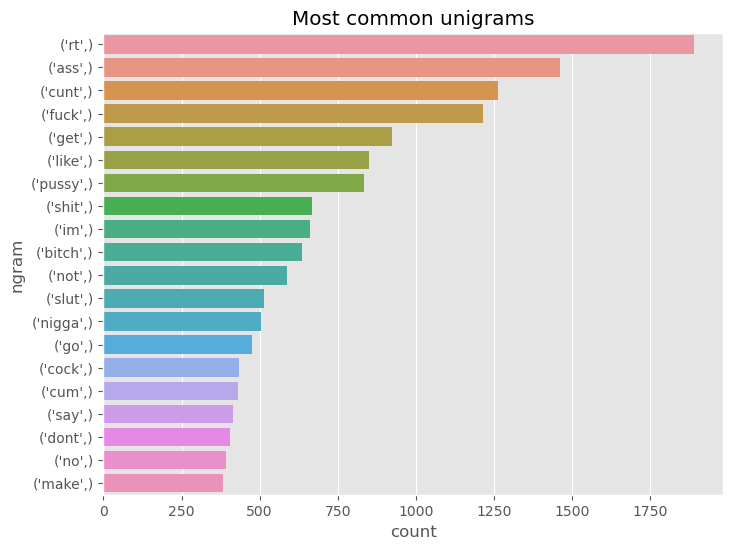

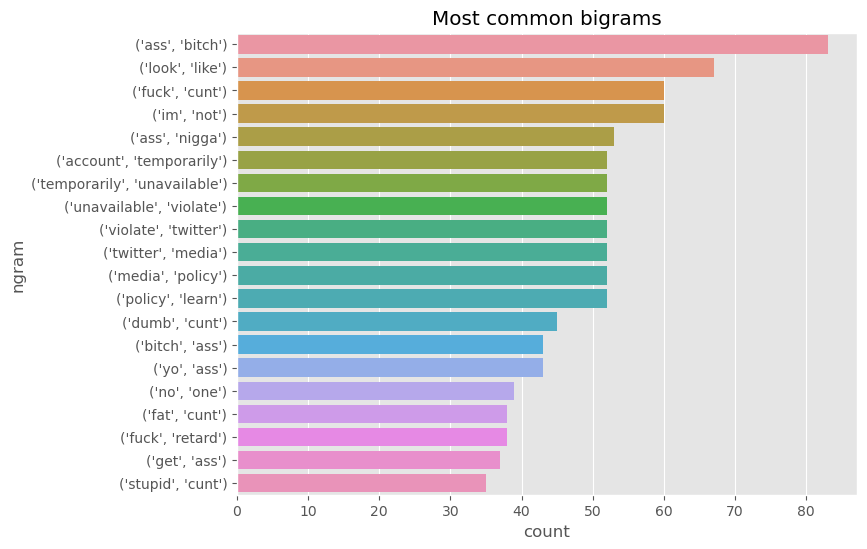

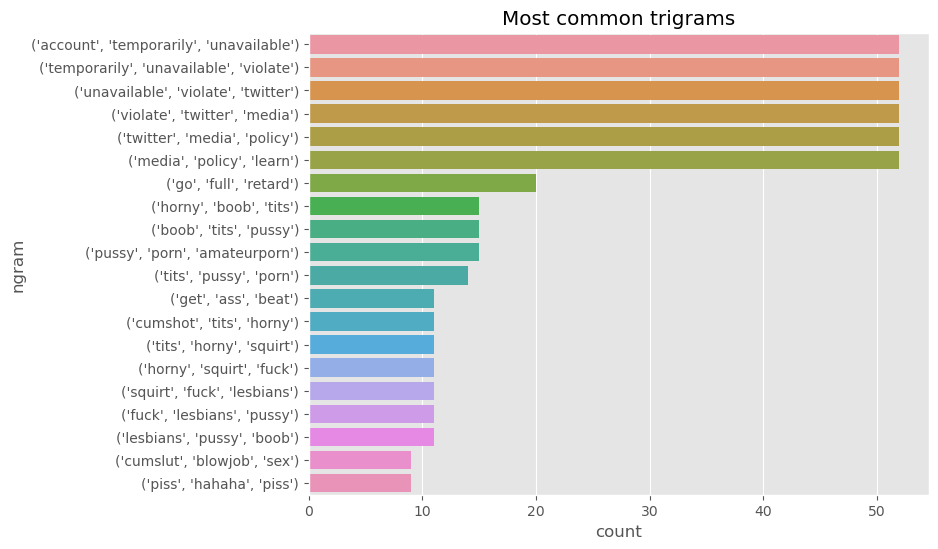

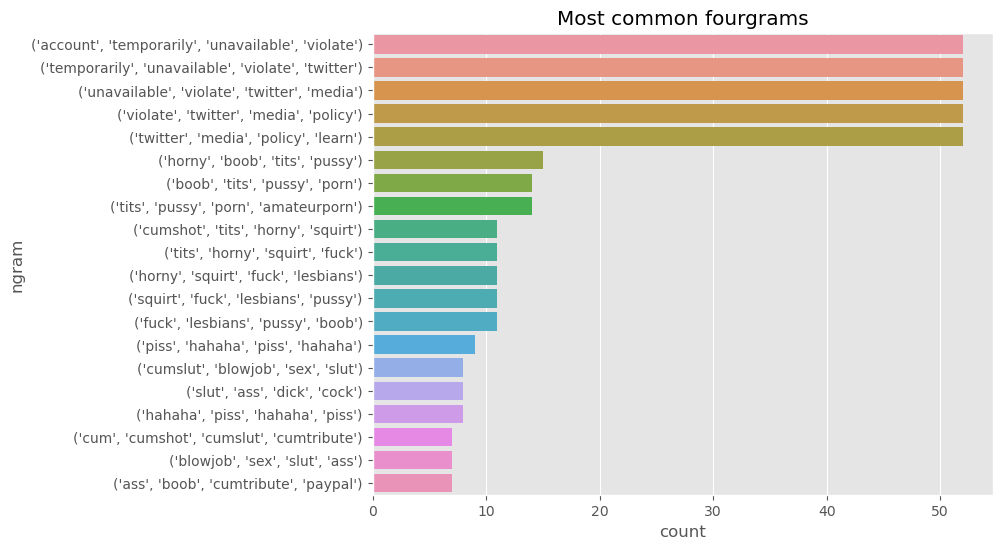

In [29]:
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def preprocess_text(text):
    """Preprocess text into normalised tokens."""
    # Tokenise words into alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords
def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [preprocess_text(document) for document in corpus]
    
    # Find ngrams per document
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    
    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(8,6))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(data['Tweet'], i))
    plt.title(f"Most common {mapping[i]}grams")
    plt.savefig("figures/common{}grams.png".format(i), bbox_inches='tight')